In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Load in data
dogData = pd.read_csv('dogData.csv')
dogData.index = dogData['PetID']
catData = pd.read_csv('catData.csv')
catData.index = catData['PetID']

## Dog response variable cleaning

In [3]:
dogData.head(3)

,PetID,Age,Quantity,Fee,VideoAmt,Description,PhotoAmt,AdoptionSpeed,PureBreed_0,PureBreed_1,...,kind,little,lovely,playful,puppy,shelter,siblings,stray,sweet,trained
PetID,,,,,,,,,,,,,,,,,,,,,
3422e4906,3422e4906,1,1,0,0,Their pregnant mother was dumped by her irresp...,7,3,1,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5842f1ff5,5842f1ff5,4,1,150,0,"Good guard dog, very alert, active, obedience ...",8,2,1,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
850a43f90,850a43f90,1,1,0,0,This handsome yet cute boy is up for adoption....,3,2,1,0,...,0.0,0.0,0.0,0.225212,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7688 entries, 3422e4906 to a83d95ead
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PetID          7688 non-null   object 
 1   Age            7688 non-null   int64  
 2   Quantity       7688 non-null   int64  
 3   Fee            7688 non-null   int64  
 4   VideoAmt       7688 non-null   int64  
 5   Description    7685 non-null   object 
 6   PhotoAmt       7688 non-null   int64  
 7   AdoptionSpeed  7688 non-null   int64  
 8   PureBreed_0    7688 non-null   int64  
 9   PureBreed_1    7688 non-null   int64  
 10  Breed_20       7688 non-null   int64  
 11  Breed_103      7688 non-null   int64  
 12  Breed_109      7688 non-null   int64  
 13  Breed_141      7688 non-null   int64  
 14  Breed_179      7688 non-null   int64  
 15  Breed_189      7688 non-null   int64  
 16  Breed_205      7688 non-null   int64  
 17  Breed_213      7688 non-null   int64  
 18  

In [5]:
dogData.AdoptionSpeed.value_counts() 

4    2283
2    2051
3    1849
1    1348
0     157
Name: AdoptionSpeed, dtype: int64

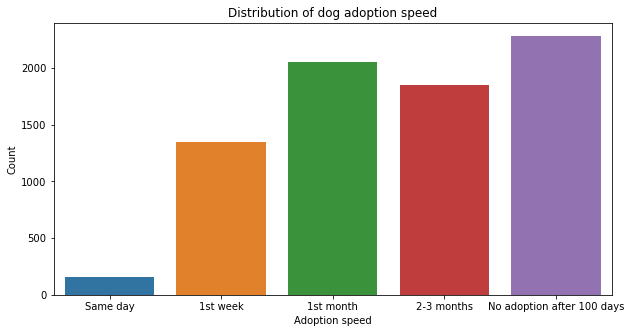

In [6]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=dogData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Convert response variable into binary. 0: within 100 days, 1: after 100 days.

In [7]:
dogData.AdoptionSpeed = np.where((dogData.AdoptionSpeed == 4), 1, 0)

In [8]:
dogData.AdoptionSpeed.value_counts()

0    5405
1    2283
Name: AdoptionSpeed, dtype: int64

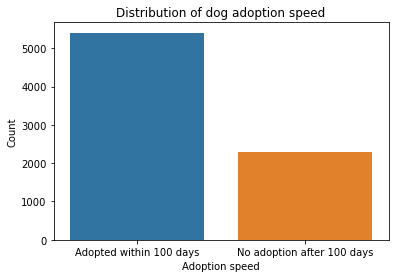

In [9]:
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=dogData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,2), ['Adopted within 100 days', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Save cleaned dog dataframe to CSV.

In [10]:
dogData.drop(columns = 'PetID', inplace = True)
dogData.to_csv (r'cleanedDogData.csv', index = True, header=True)

## Cat response variable cleaning

In [11]:
catData.AdoptionSpeed.value_counts() 

2    1793
4    1691
1    1611
3    1254
0     235
Name: AdoptionSpeed, dtype: int64

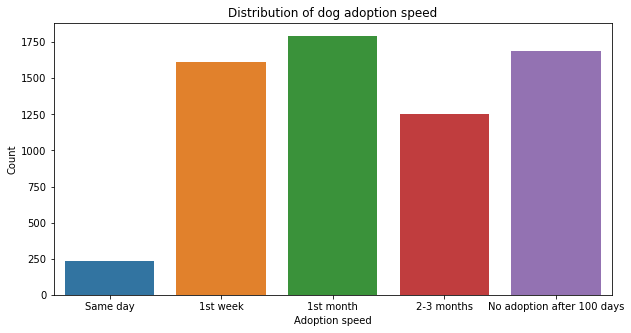

In [12]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=catData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Convert response variable into binary. 0: within 100 days, 1: after 100 days.

In [13]:
catData.AdoptionSpeed = np.where((catData['AdoptionSpeed'] == 4), 1, 0)
catData.AdoptionSpeed.value_counts()

0    4893
1    1691
Name: AdoptionSpeed, dtype: int64

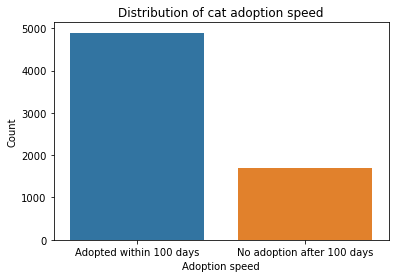

In [14]:
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=catData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,2), ['Adopted within 100 days', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of cat adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Save cleaned cat dataframe to CSV.

In [15]:
catData.drop(columns = 'PetID', inplace = True)
catData.to_csv(r'cleanedCatData.csv', index = True, header=True)

## Analysis

In [16]:
contCols = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
dogCategCols = dogData.drop(columns = (contCols + ['Description', 'AdoptionSpeed'] + list(dogData.columns[-20:]))).columns 
catCategCols = catData.drop(columns = (contCols + ['Description', 'AdoptionSpeed'] + list(catData.columns[-20:]))).columns

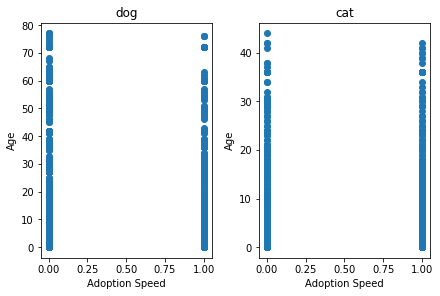

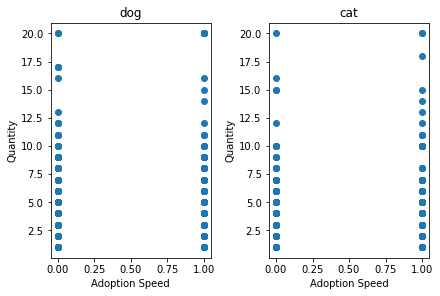

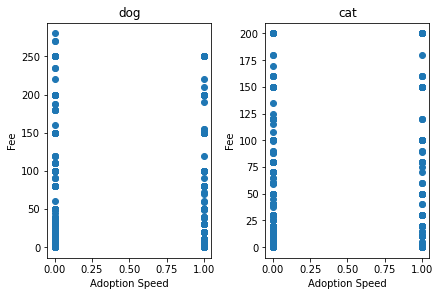

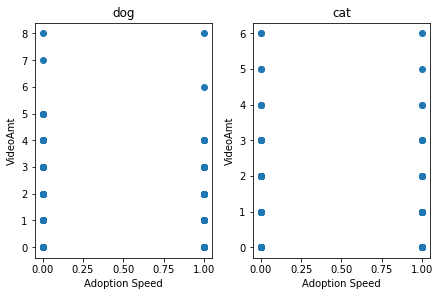

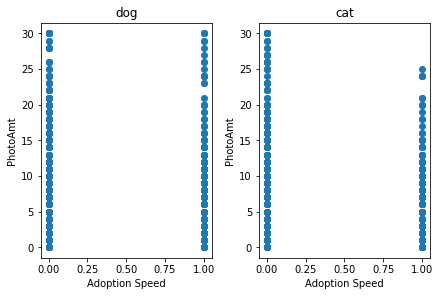

In [17]:
types = ['dog', 'cat']
for col in contCols:
    i = 0
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    for t in types:
        if t == 'dog':
            df = dogData
        else: 
            df = catData
        ax[i].scatter(df.AdoptionSpeed, df[col])
        ax[i].set_ylabel(str(col))
        ax[i].set_xlabel('Adoption Speed')
        ax[i].set_title(str(t))
        i += 1
plt.show()

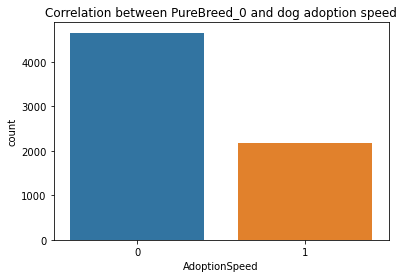

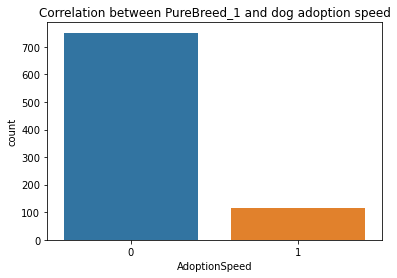

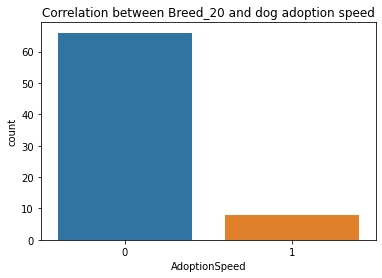

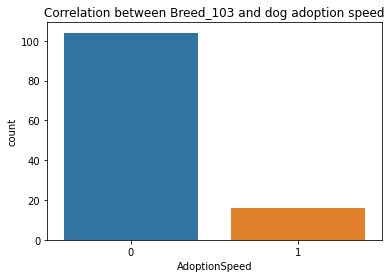

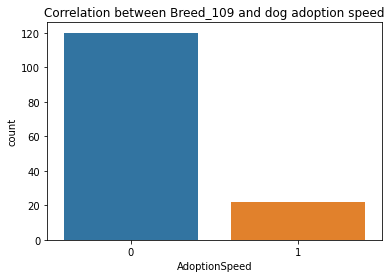

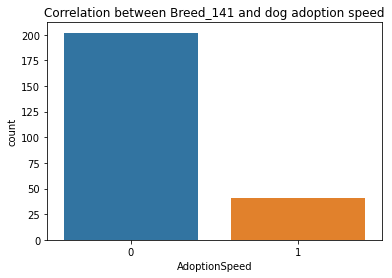

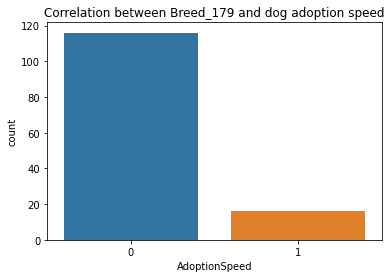

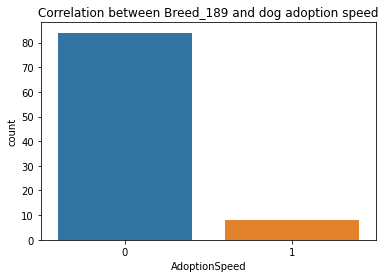

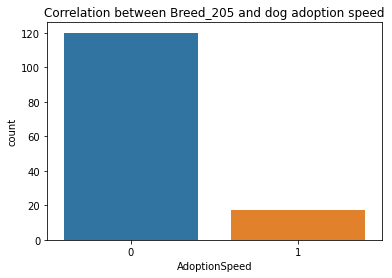

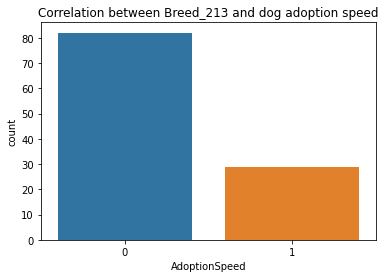

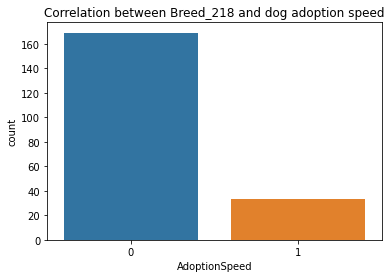

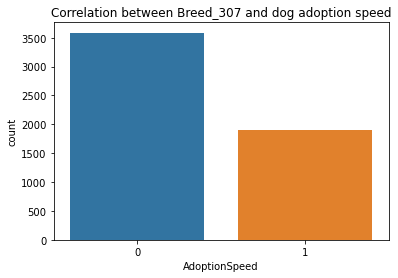

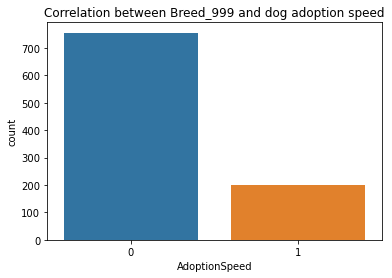

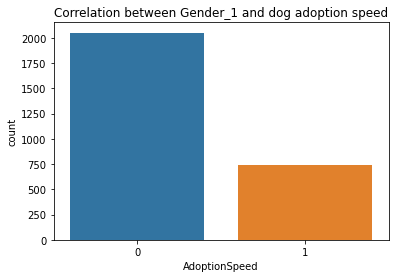

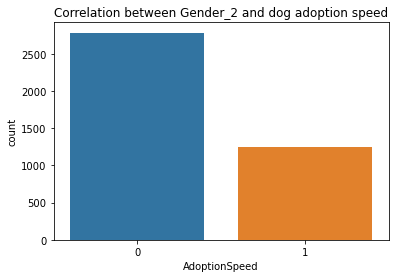

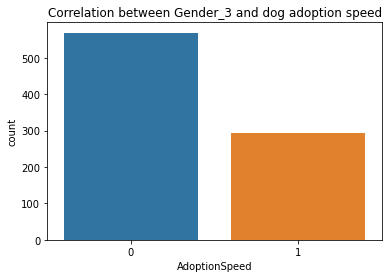

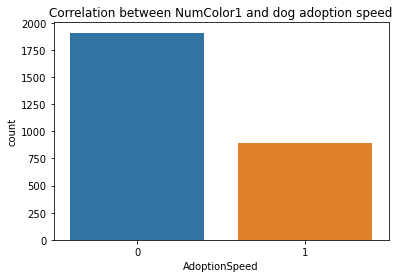

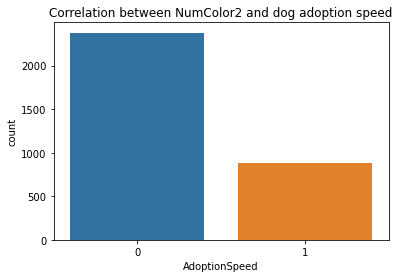

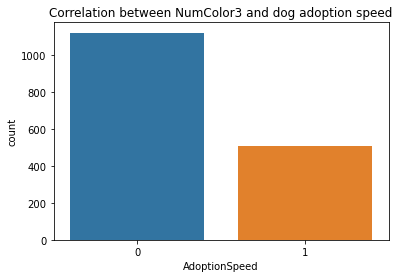

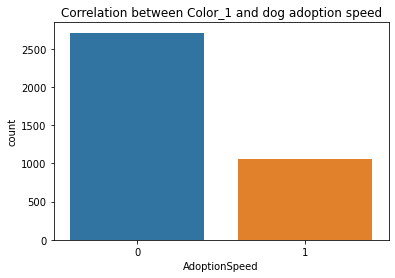

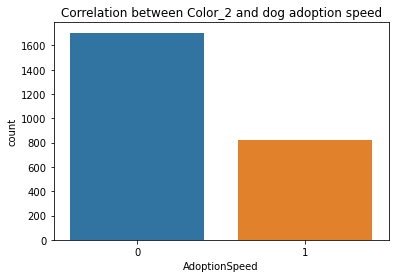

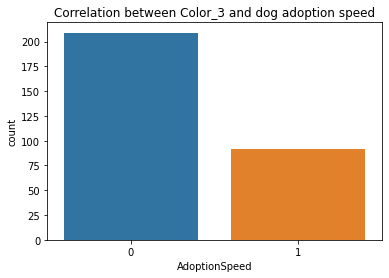

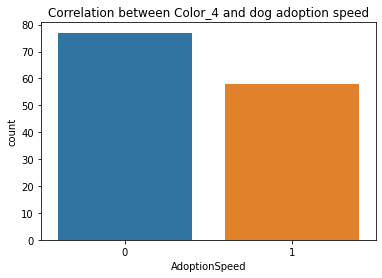

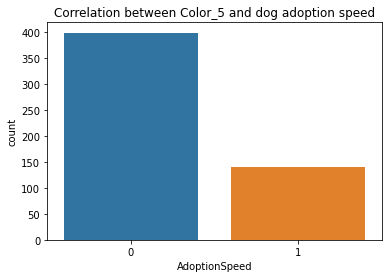

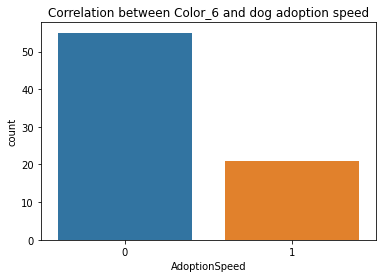

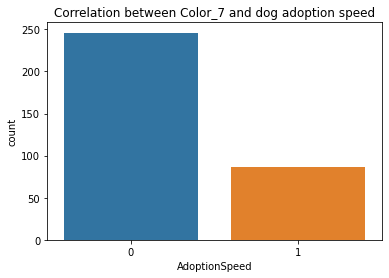

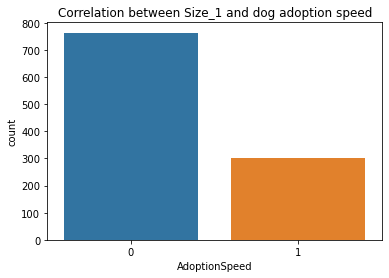

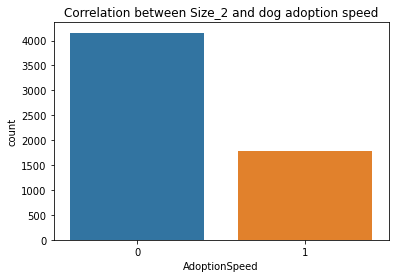

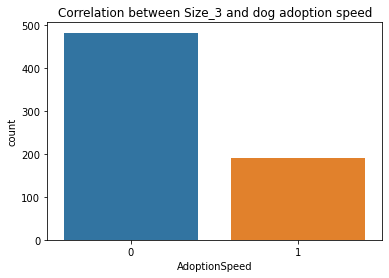

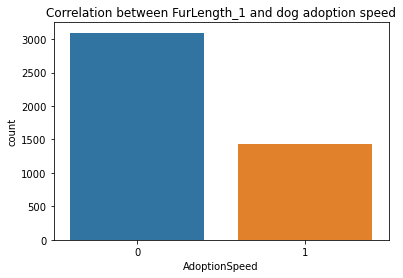

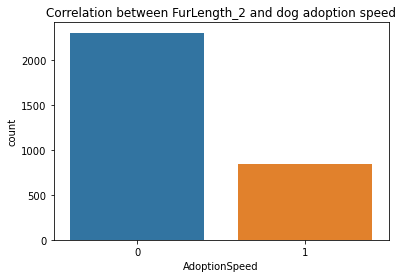

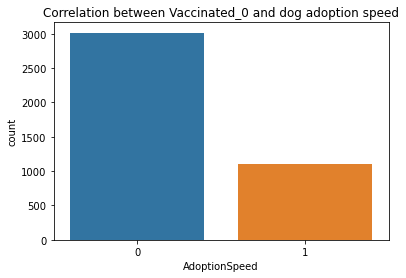

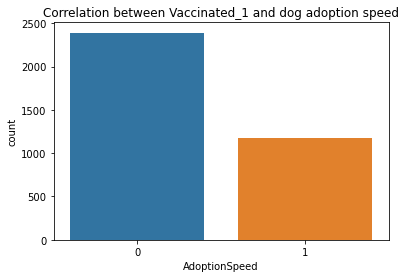

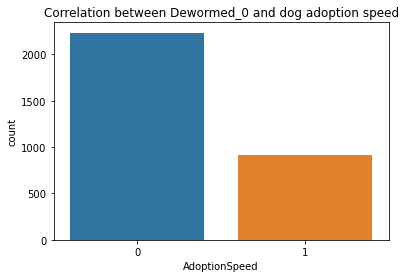

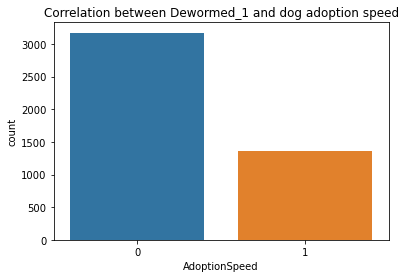

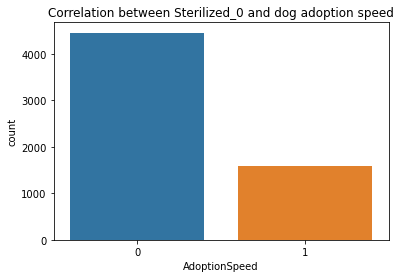

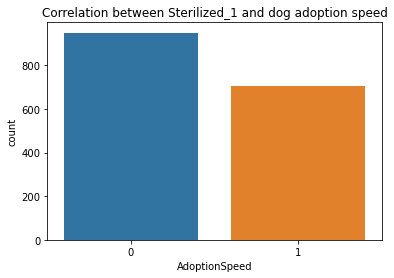

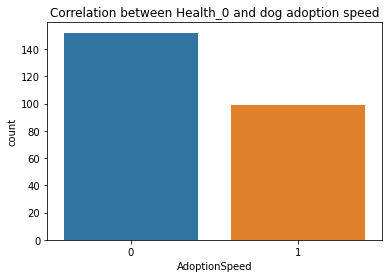

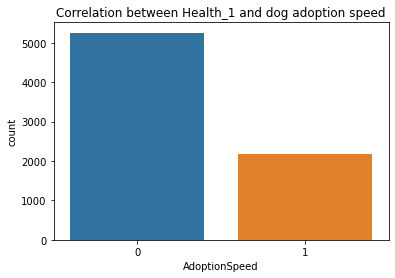

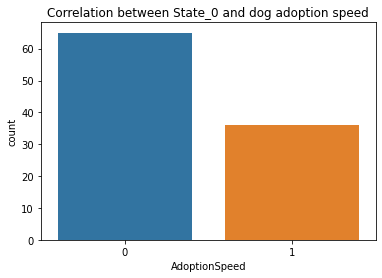

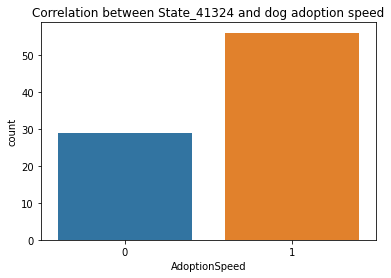

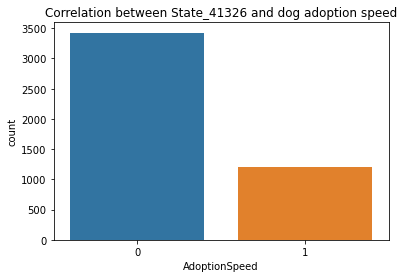

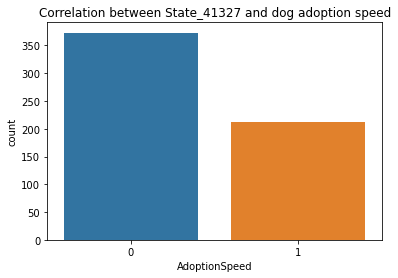

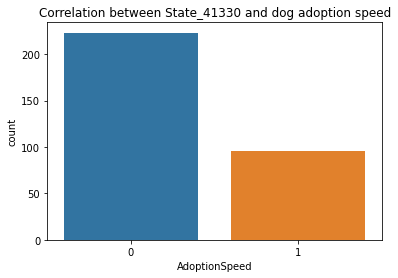

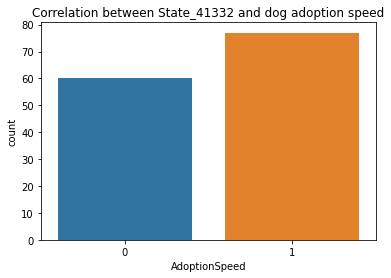

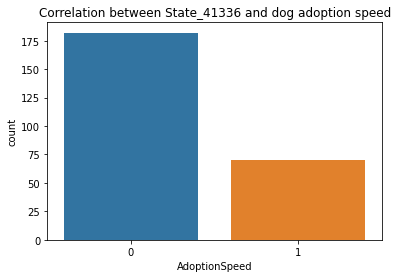

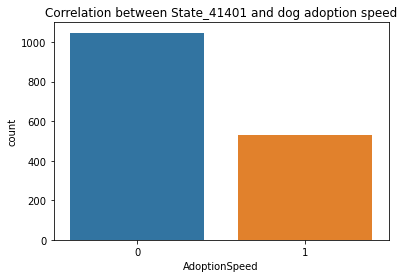

In [18]:
for col in list(dogCategCols):
    sns.countplot(data = dogData[dogData[col] == 1], x='AdoptionSpeed')
    plt.title('Correlation between ' + col + ' and dog adoption speed')
    plt.xticks([0, 1])
    plt.show()

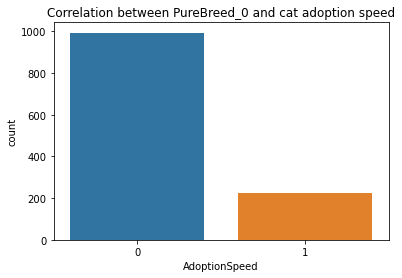

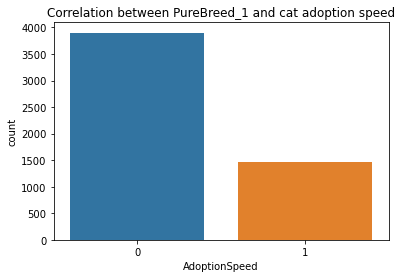

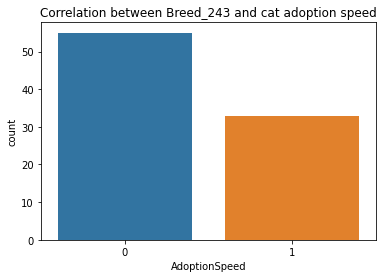

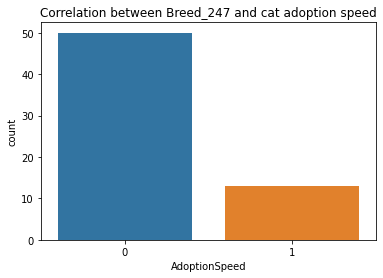

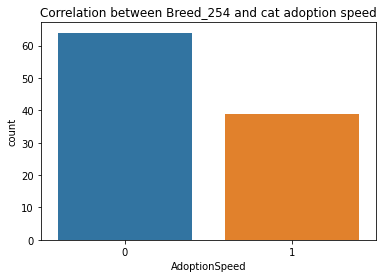

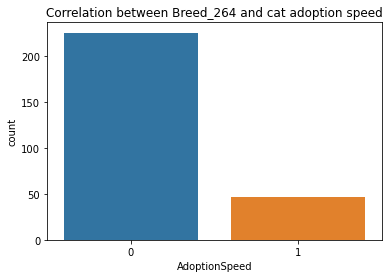

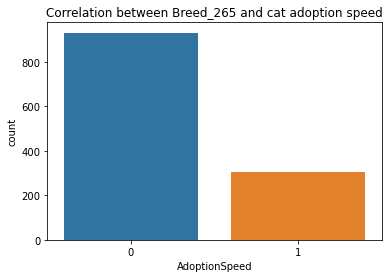

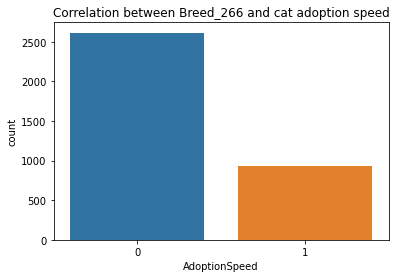

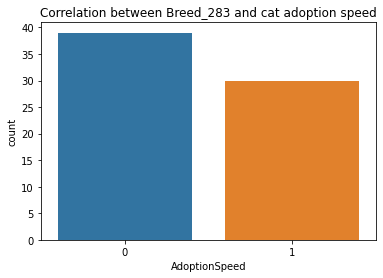

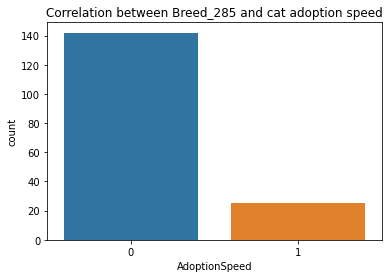

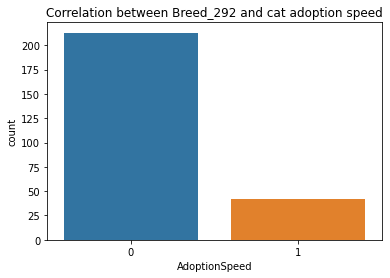

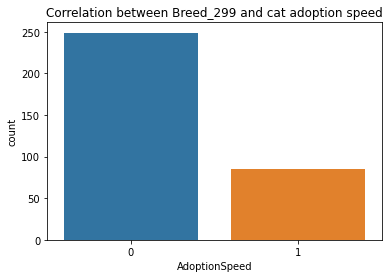

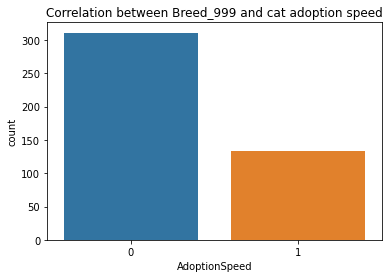

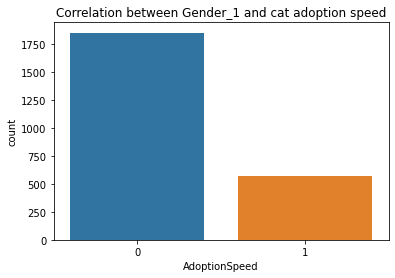

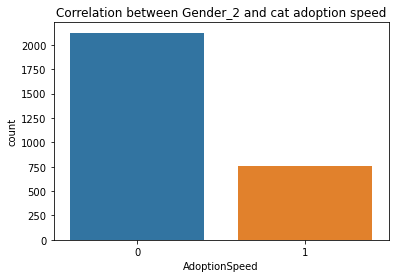

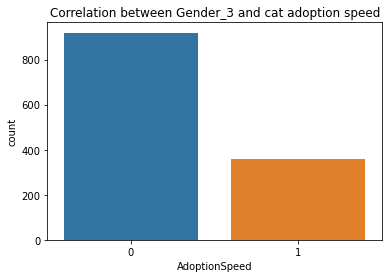

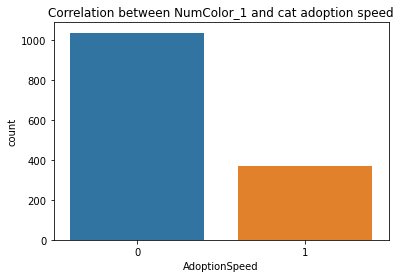

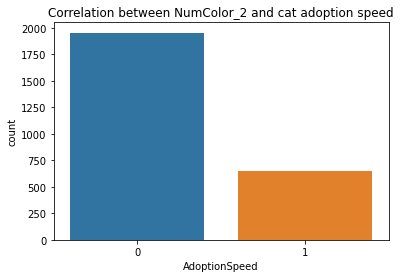

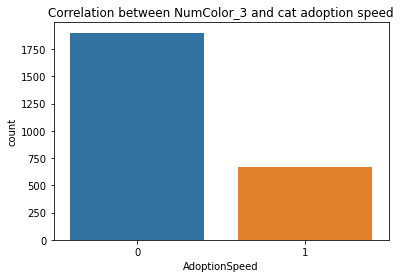

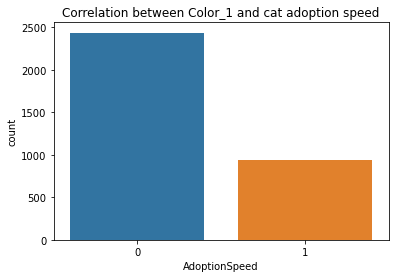

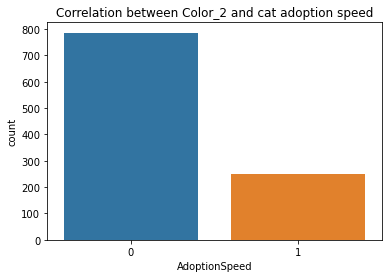

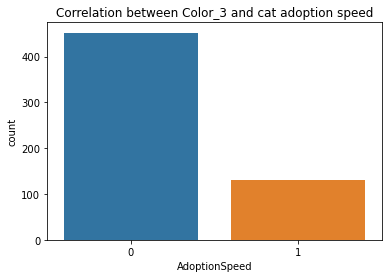

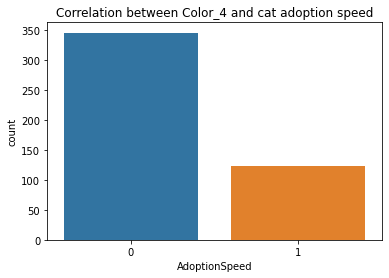

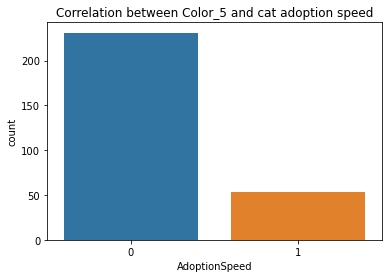

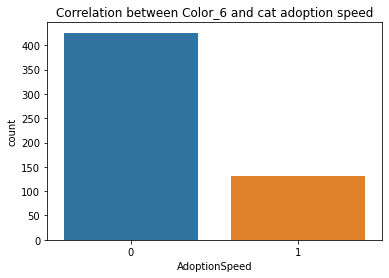

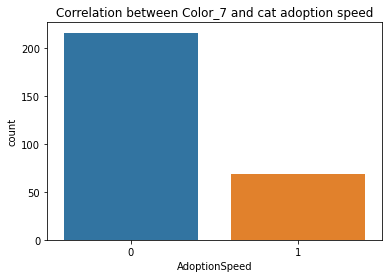

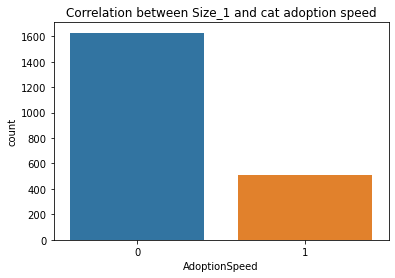

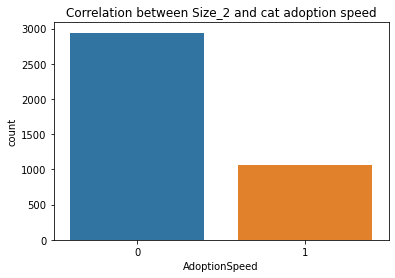

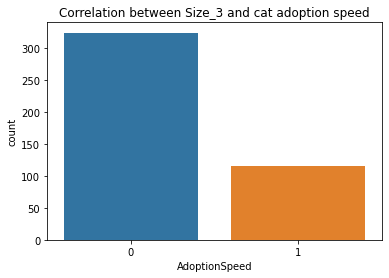

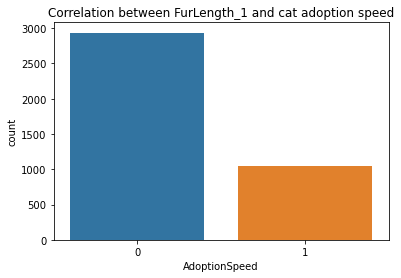

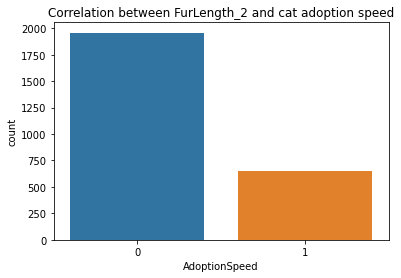

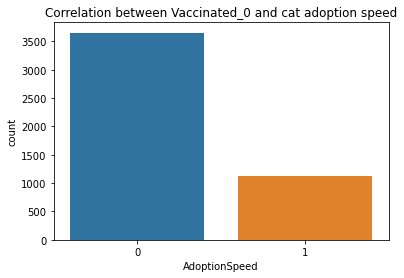

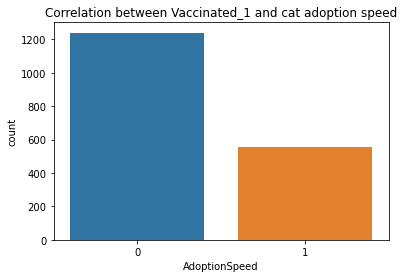

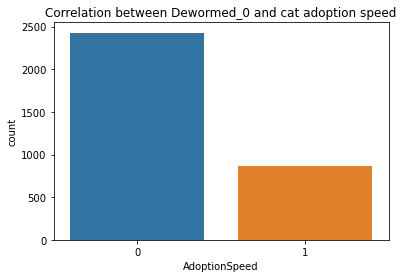

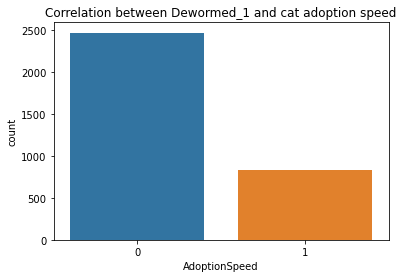

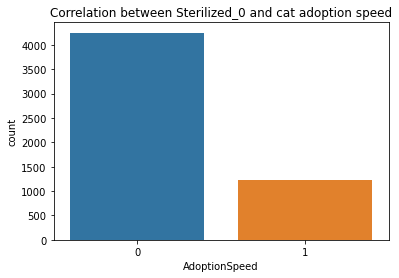

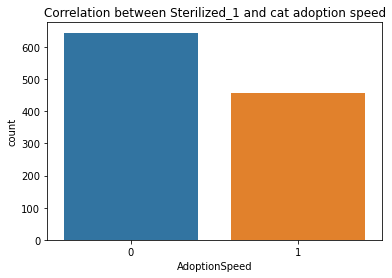

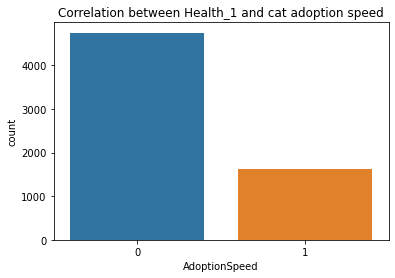

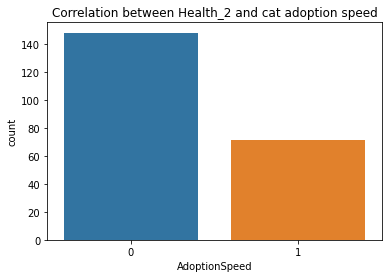

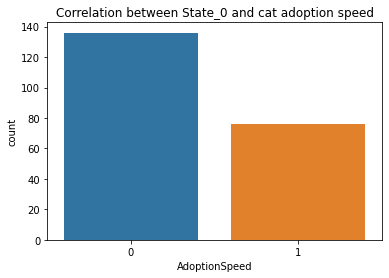

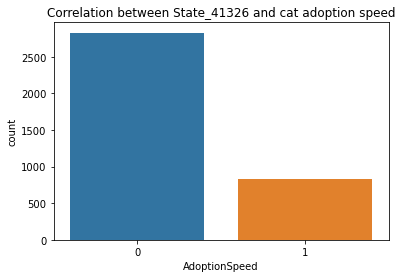

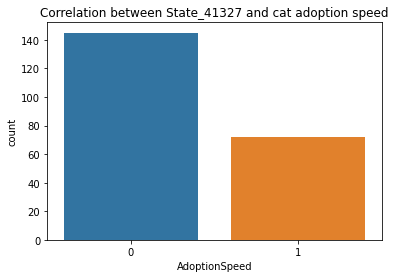

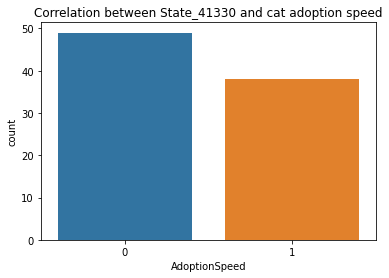

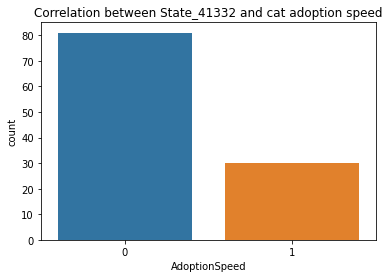

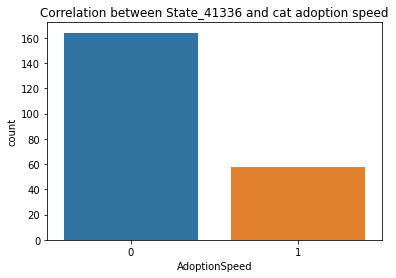

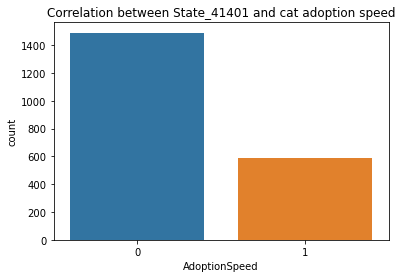

In [19]:
for col in catCategCols:
    sns.countplot(data = catData[catData[col] == 1], x='AdoptionSpeed')
    plt.title('Correlation between ' + col + ' and cat adoption speed')
    plt.show()